# Visualisation of Value and first order Greeks of a European Call Option in Black-Scholes-Merton Model

In [ ]:
# install qftools from github
%pip install git+https://github.com/akaufman22/qftools.git

In [ ]:
import numpy as np
import plotly.graph_objects as go

from qftools.options import VanillaOption

In [3]:
o = VanillaOption(105., 1.0, 0)
S = 100
r = 0.05
q = 0
sigma = 0.2
maturities = np.linspace(0.05, 2, 20)
strikes = np.linspace(80, 120, 20)
T, K = np.meshgrid(strikes, maturities)
C = np.zeros_like(K)
V = np.zeros_like(C)
G = np.zeros_like(C)
Th = np.zeros_like(C)
Rh = np.zeros_like(C)
for t in enumerate(maturities):
    for k in enumerate(strikes):
        o.T = t[1]
        o.K = k[1]
        C[t[0], k[0]] = o.bs_value(S, r, q, sigma)
        V[t[0], k[0]] = o.bs_vega(S, r, q, sigma)
        G[t[0], k[0]] = o.bs_gamma(S, r, q, sigma)
        Th[t[0], k[0]] = o.bs_theta(S, r, q, sigma)
        Rh[t[0], k[0]] = o.bs_rho(S, r, q, sigma)

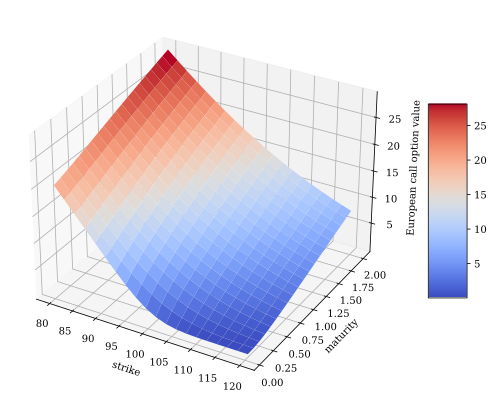

In [4]:
from pylab import cm, mpl, plt
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['font.family'] = 'serif'
%config InlineBackend.figure_format = 'svg'
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 7))
surf = ax.plot_surface(T, K, C, rstride=1, cstride=1,
            cmap=cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('maturity')
ax.set_zlabel('European call option value')
fig.colorbar(surf, shrink=0.5, aspect=5);

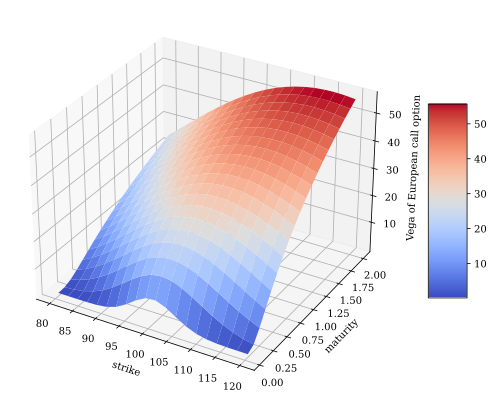

In [5]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 7))
surf = ax.plot_surface(T, K, V, rstride=1, cstride=1,
            cmap=cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('maturity')
ax.set_zlabel('Vega of European call option')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [11]:
fig = go.Figure(data=[go.Surface(z=C, x=T, y=K, colorscale="OrRd")])
fig.update_layout(title='Call Option Value', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene=dict(xaxis_title='Maturity',
                             yaxis_title='Strike',
                             zaxis_title='Option Value'))
fig.show()

In [12]:
fig = go.Figure(data=[go.Surface(z=V, x=T, y=K, colorscale="OrRd")])
fig.update_layout(title='Call Option Vega', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene=dict(xaxis_title='Maturity',
                             yaxis_title='Strike',
                             zaxis_title='Option Vega'))
fig.show()

In [13]:
fig = go.Figure(data=[go.Surface(z=G, x=T, y=K, colorscale="OrRd")])
fig.update_layout(title='Call Option Gamma', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene=dict(xaxis_title='Maturity',
                             yaxis_title='Strike',
                             zaxis_title='Option Gamma'))
fig.show()

In [14]:
fig = go.Figure(data=[go.Surface(z=Th, x=T, y=K, colorscale="OrRd")])
fig.update_layout(title='Call Option Theta', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene=dict(xaxis_title='Maturity',
                             yaxis_title='Strike',
                             zaxis_title='Option Theta'))
fig.show()

In [15]:
fig = go.Figure(data=[go.Surface(z=Rh, x=T, y=K, colorscale="OrRd")])
fig.update_layout(title='Call Option Rho', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene=dict(xaxis_title='Maturity',
                             yaxis_title='Strike',
                             zaxis_title='Option Rho'))
fig.show()